<a href="https://colab.research.google.com/github/aidawm/new_repo/blob/main/horse%26human1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-05-28 01:21:38--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c02::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  43.9MB/s    in 3.2s    

2021-05-28 01:21:42 (43.9 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-05-28 01:21:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [2]:

import tensorflow as tf
import numpy as np 
import os 
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref=  zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()


local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref=  zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [4]:
train_horse = os.path.join('/tmp/horse-or-human/horses')
train_human = os.path.join('/tmp/horse-or-human/humans')
valid_horse = os.path.join('/tmp/validation-horse-or-human/horses')
valid_human = os.path.join('/tmp/validation-horse-or-human/humans')
#type = str

train_horse_name = os.listdir(train_horse)
train_human_name = os.listdir(train_human)
valid_horse_name = os.listdir(valid_horse)
valid_human_name = os.listdir(valid_human)
#type = list

In [5]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512,activation='relu'),
                             tf.keras.layers.Dense(2,activation='softmax')])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human/',target_size=(300,300),batch_size=128,class_mode='binary')
valid_generator = valid_datagen.flow_from_directory('/tmp/validation-horse-or-human/',target_size=(300,300),batch_size=32,class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [9]:
history=model.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=1,validation_data=valid_generator,validation_steps=8)


Epoch 1/15
8/8 [==============================] - 84s 10s/step - loss: 0.9272 - accuracy: 0.5083 - val_loss: 0.6752 - val_accuracy: 0.8242
Epoch 2/15
8/8 [==============================] - 81s 10s/step - loss: 0.7553 - accuracy: 0.6429 - val_loss: 0.5653 - val_accuracy: 0.7148
Epoch 3/15
8/8 [==============================] - 82s 12s/step - loss: 0.5706 - accuracy: 0.7531 - val_loss: 1.4502 - val_accuracy: 0.5547
Epoch 4/15
8/8 [==============================] - 82s 12s/step - loss: 0.4219 - accuracy: 0.7987 - val_loss: 0.3558 - val_accuracy: 0.8789
Epoch 5/15
8/8 [==============================] - 88s 10s/step - loss: 0.3811 - accuracy: 0.8365 - val_loss: 0.8629 - val_accuracy: 0.8438
Epoch 6/15
8/8 [==============================] - 92s 12s/step - loss: 0.1554 - accuracy: 0.9385 - val_loss: 1.6114 - val_accuracy: 0.8008
Epoch 7/15
8/8 [==============================] - 83s 10s/step - loss: 0.3468 - accuracy: 0.8732 - val_loss: 0.8035 - val_accuracy: 0.8242
Epoch 8/15
8/8 [===========

In [10]:
import numpy as np 
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  
  else:
    print(fn + " is a horse")

IndentationError: ignored

Text(0.5, 1.0, 'Training and validation loss')

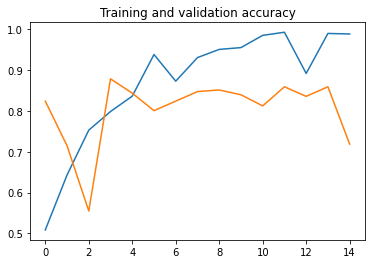

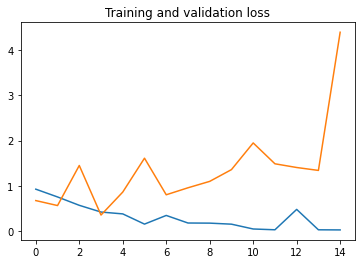

In [13]:

import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [22]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  
        target_size=(300, 300),  
        batch_size=128,
        class_mode='binary')

valid_generator = valid_datagen.flow_from_directory('/tmp/validation-horse-or-human/',target_size=(300,300),batch_size=32,class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = valid_generator,
      validation_steps=8)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 99s 12s/step - loss: 0.5330 - accuracy: 0.7442 - val_loss: 0.9382 - val_accuracy: 0.7227
Epoch 2/15
8/8 [==============================] - 99s 12s/step - loss: 0.7220 - accuracy: 0.7620 - val_loss: 0.6912 - val_accuracy: 0.6953
Epoch 3/15
8/8 [==============================] - 98s 12s/step - loss: 0.4581 - accuracy: 0.7953 - val_loss: 1.6920 - val_accuracy: 0.6016
Epoch 4/15
8/8 [==============================] - 122s 15s/step - loss: 0.3771 - accuracy: 0.8340 - val_loss: 0.8038 - val_accuracy: 0.8086
Epoch 5/15
8/8 [==============================] - 109s 13s/step - loss: 0.3171 - accuracy: 0.8545 - val_loss: 2.5490 - val_accuracy: 0.6445
Epoch 6/15
8/8 [==============================] - 104s 13s/step - loss: 0.4430 - accuracy: 0.8343 - val_loss: 0.3435 - val_accuracy: 0.8945
Epoch 7/15
8/8 [==============================] - 104s 13s/step - loss: 0.3803 -

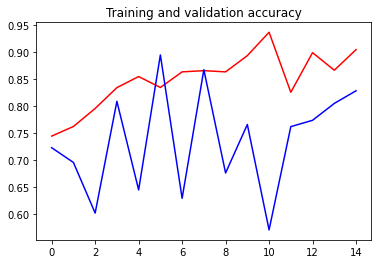

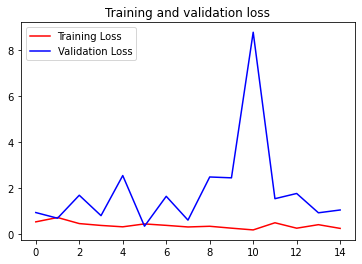

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()